In [1]:
import pandas as pd
import zipfile
import io
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
spiral_train_dir = r'C:\Users\91859\Desktop\parkinson\p disease\spiral\training'
spiral_test_dir = r'C:\Users\91859\Desktop\parkinson\p disease\spiral\testing'

In [4]:
spiral_train_datagen = ImageDataGenerator(rescale=1./255)
spiral_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up batch size and target image dimensions
batch_size = 32
img_height = 128
img_width = 128

In [5]:
# Define training and testing generators
spiral_train_generator = spiral_train_datagen.flow_from_directory(
    spiral_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

spiral_test_generator = spiral_test_datagen.flow_from_directory(
    spiral_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [6]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])

In [7]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(
    spiral_train_generator,
    steps_per_epoch=len(spiral_train_generator),
    epochs=50,
    validation_data=spiral_test_generator,
    validation_steps=len(spiral_test_generator)
)

Epoch 1/50


3/3 [==============================] - 6s 896ms/step - loss: 2.4790 - accuracy: 0.5000 - val_loss: 0.7723 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 1s 285ms/step - loss: 0.7541 - accuracy: 0.5000 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 1s 288ms/step - loss: 0.6978 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 1s 280ms/step - loss: 0.6995 - accuracy: 0.4444 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 1s 273ms/step - loss: 0.6928 - accuracy: 0.6250 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 1s 283ms/step - loss: 0.6973 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 1s 301ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==

In [9]:
print(f'Final Test Accuracy: {model.evaluate(spiral_train_generator)[1]:.4f}')

3/3 [==============================] - 0s 94ms/step - loss: 0.1017 - accuracy: 0.9722
Final Test Accuracy: 0.9722


In [10]:
import os

strain_dir = r"C:\Users\91859\Desktop\parkinson\p disease\spiral\training"
stest_dir = r"C:\Users\91859\Desktop\parkinson\p disease\spiral\testing"

# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(strain_dir))

print("Class names:", class_names)

Class names: ['healthy', 'parkinson']


In [11]:
model.save("model.h5")

C:\Users\91859\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


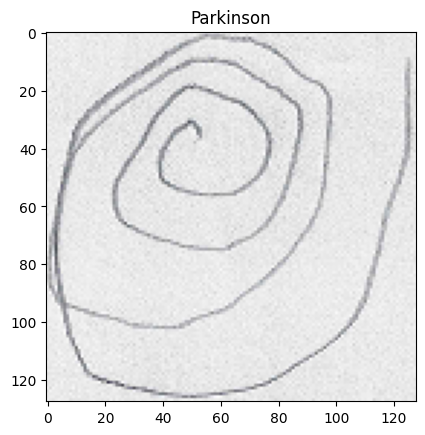

1/1 [==============================] - 0s 479ms/step
Prediction: [0.42654154 0.5734585 ]
Image can be printed.


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image

def load_samples(paths, model, class_index):
    for path in paths:
        img = image.load_img(path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(path)).capitalize())  
        plt.show()

        # Predict using the model
        prediction = model.predict(img_tensor)
        print("Prediction:", prediction[0])

        predicted_class_index = np.argmax(prediction[0])
        
        if predicted_class_index in class_index:
            print("Image can be printed.")
        else:
            print("Image cannot be printed.")

model_path = r"C:/Users/91859/Desktop/parkinson/model.h5"
model = load_model(model_path)

image_paths = [r"C:\Users\91859\Desktop\parkinson\p disease\spiral\training\parkinson\V01PE03.png"]
allowed_class_index = [0, 1]  

load_samples(image_paths, model, allowed_class_index)


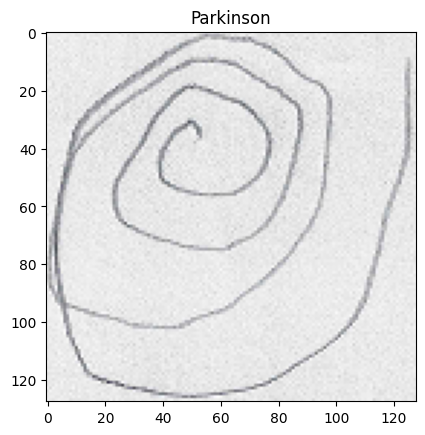

1/1 [==============================] - 0s 393ms/step
[0.42654154 0.5734585 ]


In [13]:
from keras.models import load_model
def load_samples(paths, model):
    for path in paths:
        img_path = path

        img = image.load_img(img_path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(img_path)).capitalize())  
        plt.show()

        # Predict using the model
        prediction = model.predict(img_tensor)
        #print(prediction) 

    return (prediction[0])

model_path = r"C:\Users\91859\Desktop\parkinson\model.h5"
model = load_model(model_path)

image_paths = [r"C:\Users\91859\Desktop\parkinson\p disease\spiral\training\parkinson\V01PE03.png"]
              

print(load_samples(image_paths, model))

In [14]:
wave_train_dir = r'C:\Users\91859\Desktop\parkinson\p disease\wave\training'
wave_test_dir = r'C:\Users\91859\Desktop\parkinson\p disease\wave\testing'

In [15]:
wave_train_datagen = ImageDataGenerator(rescale=1./255)
wave_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up batch size and target image dimensions
batch_size = 32
img_height = 128
img_width = 128

In [16]:
# Define training and testing generators
wave_train_generator = wave_train_datagen.flow_from_directory(
    wave_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

wave_test_generator = wave_test_datagen.flow_from_directory(
    wave_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [17]:
# Define the classifier
classifier = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])

In [18]:
# Compile the classifier
classifier.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the classifier
classifier.fit(
    wave_train_generator,
    steps_per_epoch=len(wave_train_generator),
    epochs=50,
    validation_data=wave_test_generator,
    validation_steps=len(wave_test_generator)
)

Epoch 1/50
3/3 [==============================] - 5s 1s/step - loss: 2.0894 - accuracy: 0.5000 - val_loss: 0.7789 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 1s 380ms/step - loss: 0.7603 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 1s 518ms/step - loss: 0.7041 - accuracy: 0.3889 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 1s 361ms/step - loss: 0.6967 - accuracy: 0.4722 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 1s 391ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 1s 382ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 1s 372ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 8/50
3/3 [=======

In [20]:
print(f'Final Test Accuracy: {classifier.evaluate(wave_train_generator)[1]:.4f}')

3/3 [==============================] - 1s 158ms/step - loss: 0.0079 - accuracy: 1.0000
Final Test Accuracy: 1.0000


In [21]:
import os

wtrain_dir = r"C:\Users\91859\Desktop\parkinson\p disease\wave\training"
wtest_dir = r"C:\Users\91859\Desktop\parkinson\p disease\wave\testing"

# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(strain_dir))

print("Class names:", class_names)

Class names: ['healthy', 'parkinson']


In [22]:
classifier.save("classifier.h5")

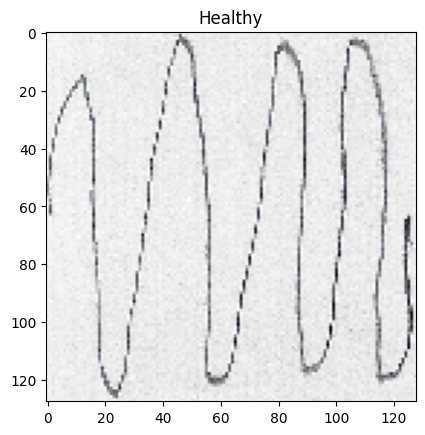

1/1 [==============================] - 0s 285ms/step
Prediction: [9.999993e-01 6.967817e-07]
Image can be printed.


In [23]:
from keras.models import load_model
def load_samples(paths, model, class_index):
    for path in paths:
        img_path = path

        img = image.load_img(img_path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(img_path)).capitalize())  
        plt.show()

        # Predict using the model
        prediction = model.predict(img_tensor)
        print("Prediction:", prediction[0])

        predicted_class_index = np.argmax(prediction[0])
        
        if predicted_class_index in class_index:
            print("Image can be printed.")
        else:
            print("Image cannot be printed.")
            
model_path = r"C:\Users\91859\Desktop\parkinson/classifier.h5"
model = load_model(model_path)

image_paths = [r"C:\Users\91859\Desktop\parkinson\p disease\wave\training\healthy\V01HO03.png"]
allowed_class_index = [0, 1]  

load_samples(image_paths, model,allowed_class_index)


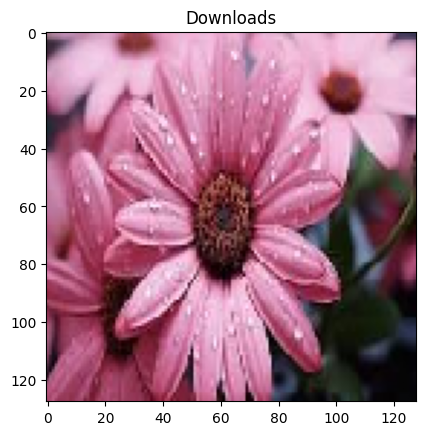

1/1 [==============================] - 0s 228ms/step
Prediction: [1.0084352e-05 9.9998987e-01]
Image can be printed.


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image

def load_samples(paths, model, class_index):
    for path in paths:
        img = image.load_img(path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(path)).capitalize())  
        plt.show()

        # Predict using the model
        prediction = model.predict(img_tensor)
        print("Prediction:", prediction[0])

        predicted_class_index = np.argmax(prediction[0])
        
        if predicted_class_index in class_index:
            print("Image can be printed.")
        else:
            print("Image cannot be printed.")

model_path = r"C:/Users/91859/Desktop/parkinson/classifier.h5"
model = load_model(model_path)

image_paths = [r"C:\Users\91859\Downloads\flower.jpeg"]
allowed_class_index = [0, 1]  

load_samples(image_paths, model, allowed_class_index)
